In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from glob import glob

In [3]:
save_directory = '/home/flanigan/temp/'
save_mkidarray01_seven_s_and_i_vs_temperature = True

In [4]:
npy_files = glob('2017-??-??_??????_temperature_fine_paired.npd.npy')
all_data = pd.concat([pd.DataFrame.from_records(np.load(f)) for f in npy_files], ignore_index=True).sort_values(by='stream_temperature_package')
all_data.shape

(280, 72)

In [5]:
all_data['good'] = ((1e-7 < all_data.res_loss_i) &
                    (all_data.res_loss_i < 1e-2) &
                    (1e-7 < all_data.res_loss_c) &
                    (all_data.res_loss_c < 1e-3))

# The fit jumped to a different resonance in this sweep
all_data.loc[(all_data.lo_index==4) &
             (all_data.root_path=='/data/detectors/2017-03-01_005241_temperature_fine_paired.npd'),
             'good'] = False

# This sweep totally missed the resonance but doesn't get cut above
all_data.loc[(all_data.lo_index==6) &
             (all_data.root_path=='/data/detectors/2017-03-01_005241_temperature_fine_paired.npd'),
             'good'] = False

In [6]:
T_mappable = plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=all_data.stream_temperature_package.min(),
                                                             vmax=all_data.stream_temperature_package.max()),
                                   cmap=plt.cm.coolwarm)
T_mappable.set_array(np.unique(all_data.stream_temperature_package))

In [7]:
x_color = 'blue'
i_color = 'brown'

In [8]:
lo_indices = np.unique(all_data.lo_index)

(-250, 2500)

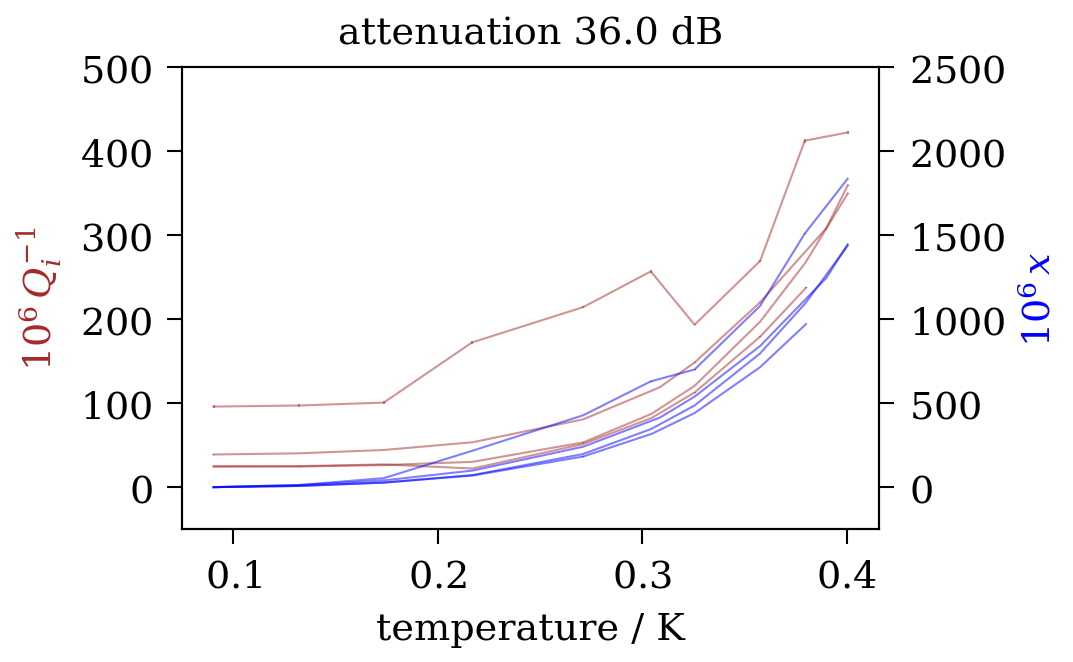

In [10]:
attenuation = 36
fig, i_ax = plt.subplots()
x_ax = i_ax.twinx()
#i_ax.set_yscale('log')
#x_ax.set_yscale('log')
i_ax.set_xlabel('temperature / K')
i_ax.set_title('attenuation {:.1f} dB'.format(attenuation))
i_ax.set_ylabel('$10^6 \, Q_i^{-1}$', color=i_color)
x_ax.set_ylabel('$10^6 \, x$', color=x_color)
for lo_index in [1, 3, 4, 5]:  #lo_indices:
    df = all_data[all_data.good &
                  (all_data.roach_dac_attenuation==attenuation) &
                  (all_data.lo_index==lo_index)]
    x = df.res_f_0.max() / df.res_f_0 - 1
    x_error = df.res_f_0_error / df.res_f_0
    i_ax.errorbar(df.stream_temperature_package,
                  1e6 * df.res_loss_i,
                  yerr=1e6 * df.res_loss_i_error,
                  marker=None, linestyle='-', color=i_color, alpha=0.5)
    x_ax.errorbar(df.stream_temperature_package,
                  1e6 * x,
                  yerr=1e6 * x_error,
                  marker=None, linestyle='-', color=x_color, alpha=0.5)
i_ax.set_ylim(-50, 500)
x_ax.set_ylim(-250, 2500)

Text(0.5,0,u'temperature / K')

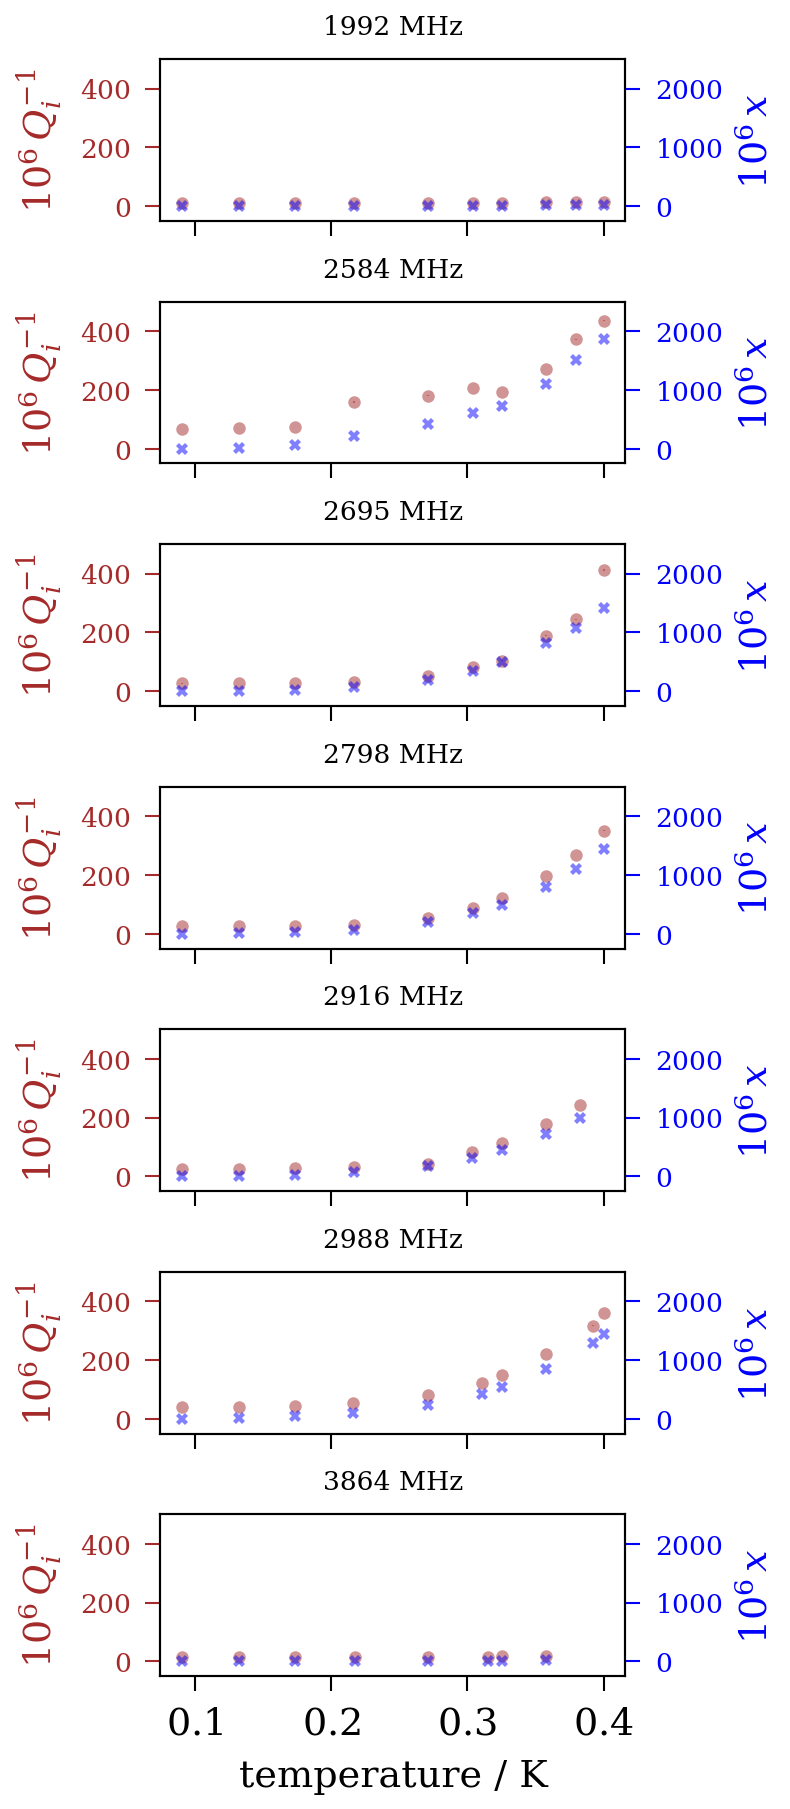

In [11]:
attenuation = 42
fig, i_axes = plt.subplots(lo_indices.size, 1, figsize=(2, lo_indices.size), sharex=True, gridspec_kw={'hspace': 0.5})
x_axes = np.array([i_ax.twinx() for i_ax in i_axes.flatten()]).reshape(i_axes.shape)
for lo_index, i_ax, x_ax in zip(lo_indices, i_axes.flatten(), x_axes.flatten()):
    i_ax.tick_params(axis='y', colors=i_color, labelsize='xx-small')
    x_ax.tick_params(axis='y', colors=x_color, labelsize='xx-small')
    i_ax.set_ylabel('$10^6 \, Q_i^{-1}$', color=i_color)
    x_ax.set_ylabel('$10^6 \, x$', color=x_color)
    df = all_data[all_data.good &
                  (all_data.roach_dac_attenuation==attenuation) &
                  (all_data.lo_index==lo_index)]
    x = df.res_f_0.max() / df.res_f_0 - 1
    x_error = df.res_f_0_error / df.res_f_0
    i_ax.set_title("{:.0f} MHz".format(1e-6 * df.res_f_0.max()), fontsize='xx-small')
    i_ax.errorbar(df.stream_temperature_package,
                  1e6 * df.res_loss_i,
                  yerr=1e6 * df.res_loss_i_error,
                  marker='o', linestyle='none', color=i_color, alpha=0.5)
    x_ax.errorbar(df.stream_temperature_package,
                  1e6 * x,
                  yerr=1e6 * x_error,
                  marker='X', linestyle='none', color=x_color, alpha=0.5)
    i_ax.set_ylim(-50, 500)
    x_ax.set_ylim(-250, 2500)
i_ax.set_xlabel('temperature / K')

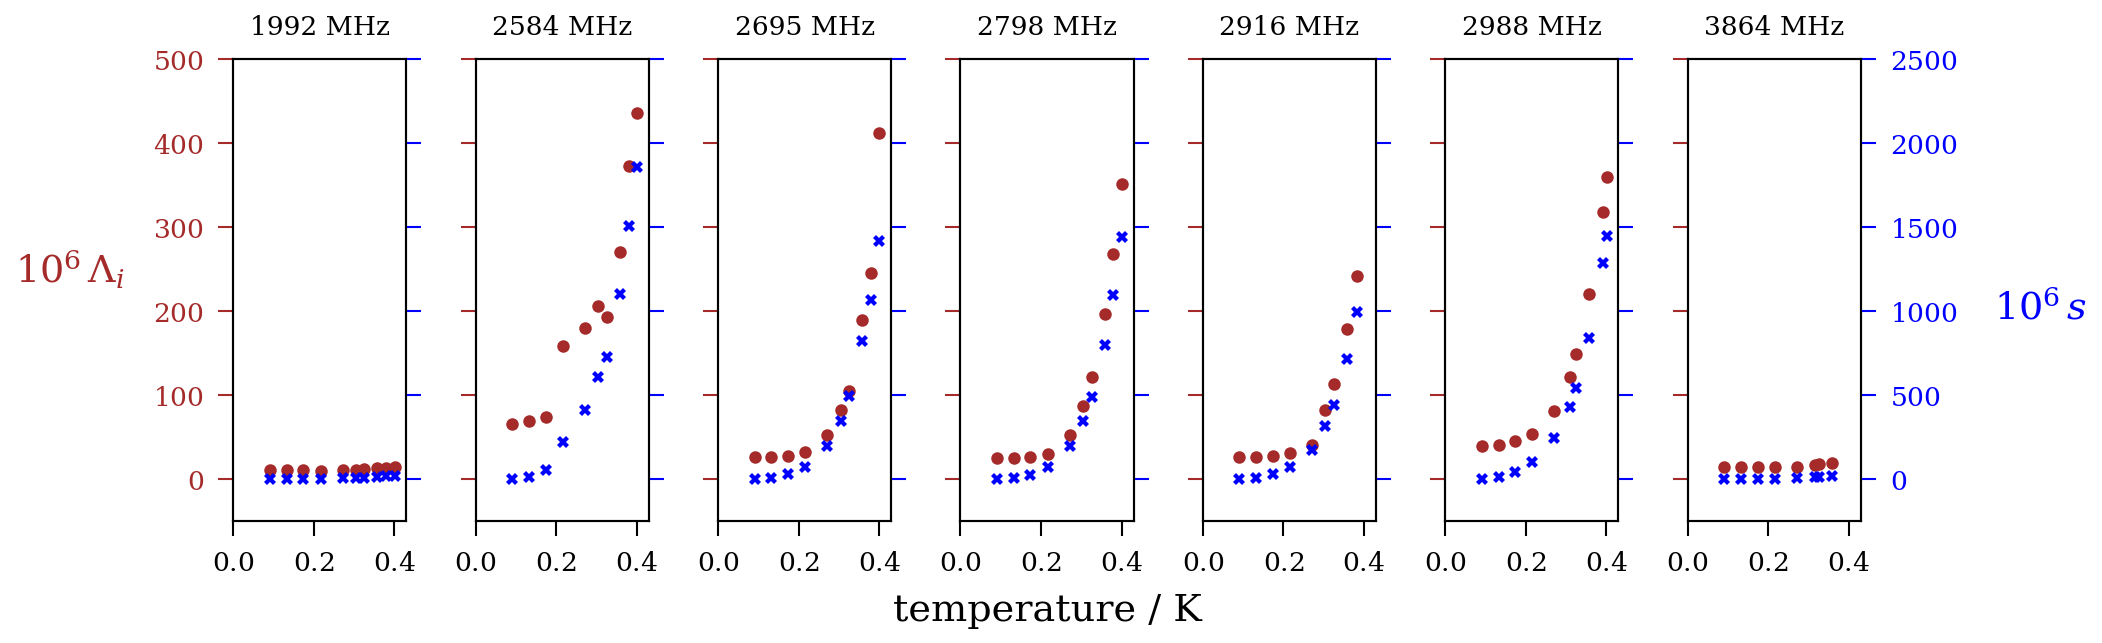

In [15]:
attenuation = 42
fig, i_axes = plt.subplots(1, lo_indices.size, figsize=(lo_indices.size, 2),
                           gridspec_kw={'wspace': 0.4})
x_axes = np.array([i_ax.twinx() for i_ax in i_axes.flatten()]).reshape(i_axes.shape)
for axis_index, (lo_index, i_ax, x_ax) in enumerate(zip(lo_indices, i_axes.flatten(), x_axes.flatten())):
    i_ax.tick_params(axis='y', colors=i_color, labelsize='xx-small')
    x_ax.tick_params(axis='y', colors=x_color, labelsize='xx-small')
    i_ax.tick_params(axis='x', labelsize='xx-small')
    if axis_index == 0:
        i_ax.set_ylabel('$10^6 \, \Lambda_i$', color=i_color, rotation='horizontal', labelpad=20)
    else:
        i_ax.set_yticklabels([])
    if axis_index == lo_indices.size - 1:
        x_ax.set_ylabel('$10^6 \, s$', color=x_color, rotation='horizontal', labelpad=20)
    else:
        x_ax.set_yticklabels([])
    i_ax.set_xlim(0, 0.43)
    i_ax.set_xticks([0, 0.2, 0.4])
    i_ax.set_ylim(-50, 500)
    x_ax.set_ylim(-250, 2500)
    
    df = all_data[all_data.good &
                  (all_data.roach_dac_attenuation==attenuation) &
                  (all_data.lo_index==lo_index)]
    x = df.res_f_0.max() / df.res_f_0 - 1
    x_error = df.res_f_0_error / df.res_f_0
    i_ax.set_title("{:.0f} MHz".format(1e-6 * df.res_f_0.max()), fontsize='xx-small')
    i_ax.errorbar(df.stream_temperature_package,
                  1e6 * df.res_loss_i,
                  yerr=1e6 * df.res_loss_i_error,
                  marker='o', linestyle='none', color=i_color, alpha=1)
    x_ax.errorbar(df.stream_temperature_package,
                  1e6 * x,
                  yerr=1e6 * x_error,
                  marker='X', linestyle='none', color=x_color, alpha=1)
i_axes[int(i_axes.size / 2)].set_xlabel('temperature / K')

if save_mkidarray01_seven_s_and_i_vs_temperature:
    fig.savefig(save_directory + 'mkidarray01_seven_s_and_i_vs_temperature.pdf')

# Noise versus temperature

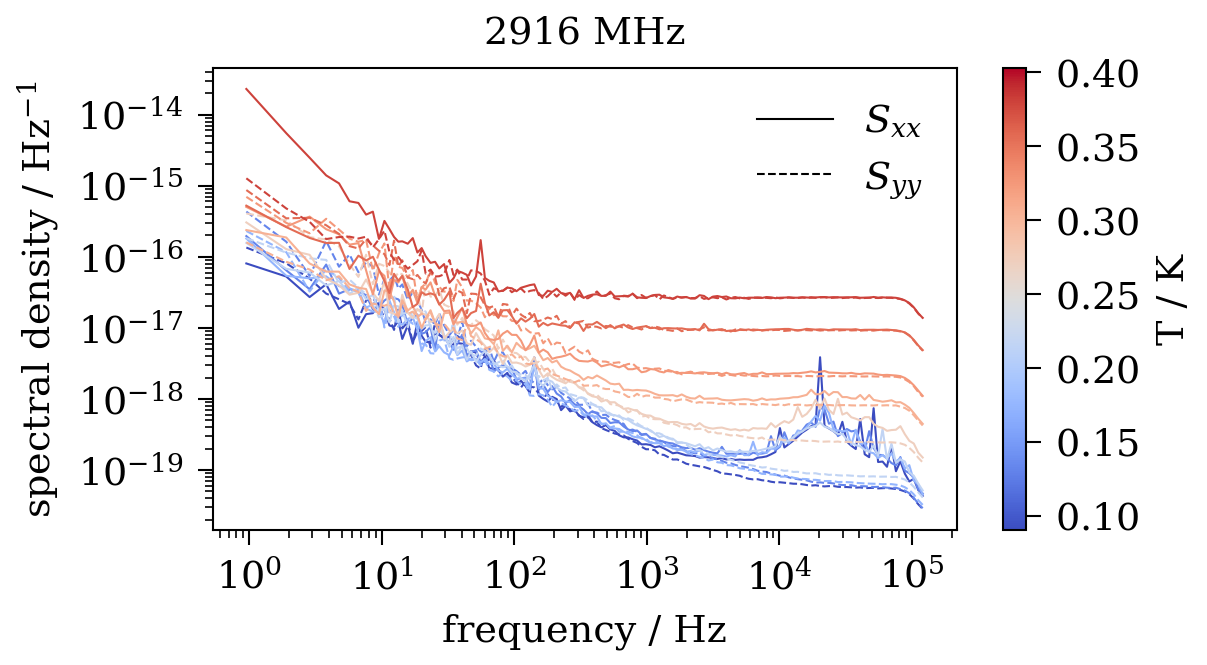

In [16]:
lo_index = 4
attenuation = 30
fig, ax = plt.subplots(figsize=(4, 2))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')
df = all_data[all_data.good &
              (all_data.lo_index==lo_index) &
              (all_data.roach_dac_attenuation==attenuation)]
ax.set_title('{:.0f} MHz'.format(1e-6 * df.res_f_0.max()))
for index, row in df.iterrows():
    ax.plot(row.S_frequency, row.S_xx, linestyle='-', color=T_mappable.to_rgba(row.stream_temperature_package))
    ax.plot(row.S_frequency, row.S_yy, linestyle='--', color=T_mappable.to_rgba(row.stream_temperature_package))
ax.plot([], color='black', linestyle='-', label='$S_{xx}$')
ax.plot([], color='black', linestyle='--', label='$S_{yy}$')
ax.legend()
fig.colorbar(T_mappable, label='T / K')

#if ...
#fig.savefig(save_directory + 'Sxx_and_Syy_vs_T_lo_index_{:d}_{:.0f}_dB.pdf'.format(lo_index, attenuation))#

# Noise versus readout power

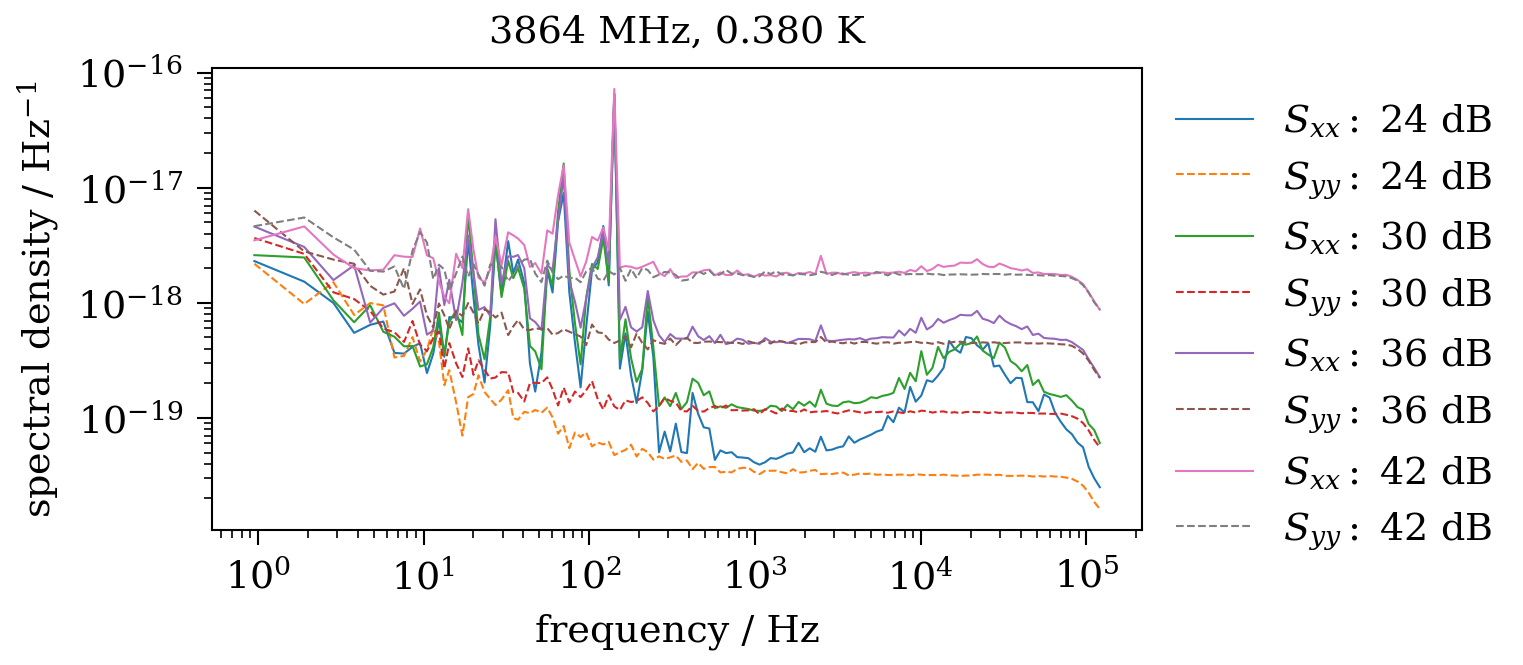

In [17]:
lo_index = 6
root_path = '/data/detectors/2017-02-28_154227_temperature_fine_paired.npd'
fig, ax = plt.subplots(figsize=(4, 2))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')
df = all_data[all_data.good &
              (all_data.lo_index==lo_index) &
              (all_data.root_path==root_path)].sort_values(by='roach_dac_attenuation')
ax.set_title('{:.0f} MHz, {:.3f} K'.format(1e-6 * df.res_f_0.max(), row.stream_temperature_package))
for index, row in df.iterrows():
    ax.plot(row.S_frequency, row.S_xx, linestyle='-',
            label='$S_{{xx}}:$ {:.0f} dB'.format(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy, linestyle='--',
            label='$S_{{yy}}:$ {:.0f} dB'.format(row.roach_dac_attenuation))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

#if ...
#fig.savefig(save_directory + 'Sxx_and_Syy_vs_readout_power_{:.0f}_MHz_{:.0f}_dB.pdf'.format(1e-6 * df.res_f_0.max(), attenuation))